<a href="https://colab.research.google.com/github/Machariajane/Dphi-ML-Bootcamp/blob/main/DatathonForest1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [ ]:
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(tax_data['PoliticalParty'])
LabelEncoder()
list(le.classes_)


['Democrat', 'Independent', 'Republican']

In [ ]:
tax_data.drop_duplicates()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican


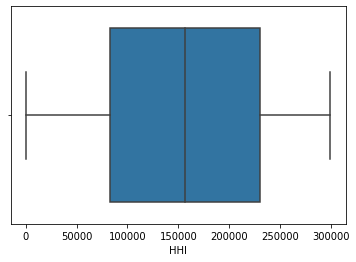

In [ ]:
sns.boxplot(x=tax_data['HHI'])

In [ ]:
tax_data.drop('Unnamed: 0',axis = 1)

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,183414,-12402,1,2,28,1,0,0,1,Democrat
1,129786,700251,2,5,63,3,0,0,0,Republican
2,268343,493411,2,4,44,1,1,0,1,Independent
3,290506,-433408,1,1,28,5,1,0,1,Republican
4,90108,907135,1,3,57,5,1,1,0,Democrat
...,...,...,...,...,...,...,...,...,...,...
798,153304,971909,0,1,99,5,1,0,0,Democrat
799,136652,-184616,1,2,31,3,1,0,0,Democrat
800,51066,-900262,1,1,67,4,0,0,0,Democrat
801,123721,-51448,2,0,23,4,0,1,1,Republican


In [ ]:
X = tax_data.drop('PoliticalParty', axis = 1) 


y =le.transform(tax_data['PoliticalParty'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
# forest.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [8, 10, 15],
    'n_estimators': [500, 1000]}

In [ ]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   23.3s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
# predict = forest.predict(X_test)

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [ ]:
test_data.drop('Unnamed: 0',axis = 1)

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,253274,-633752,2,1,94,3,0,1,1
1,47107,322850,0,1,30,2,1,1,0
2,111874,300583,0,2,46,3,0,1,1
3,96670,107419,0,3,77,5,0,0,0
4,128669,341273,0,0,92,4,1,1,1
...,...,...,...,...,...,...,...,...,...
196,138204,144986,1,1,63,1,1,1,0
197,73250,-810927,0,5,40,1,1,0,1
198,134376,352116,0,2,86,1,1,0,0
199,70820,260337,0,3,78,3,1,0,1


In [ ]:
# predictions = forest.predict(test_data)


In [ ]:
predictions = grid_search.predict(test_data)

In [ ]:

# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(le.inverse_transform(predictions))#preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv',index=False)         
files.download('prediction_results.csv')
# 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>